Generation   0: Best x = 0.61988, sin(x) = 0.99974
Generation   1: Best x = 0.67281, sin(x) = 1.00000
Generation   2: Best x = 0.00000, sin(x) = 1.00000
Generation   3: Best x = 0.00000, sin(x) = 1.00000
Generation   4: Best x = 0.00000, sin(x) = 1.00000
Generation   5: Best x = 0.00000, sin(x) = 1.00000
Generation   6: Best x = 0.00000, sin(x) = 1.00000
Generation   7: Best x = 0.00000, sin(x) = 1.00000
Generation   8: Best x = 0.00000, sin(x) = 1.00000
Generation   9: Best x = 0.00000, sin(x) = 1.00000

Optimal Solution:
x = 0.00000 (0.0% of π)
sin(x) = 0.00000


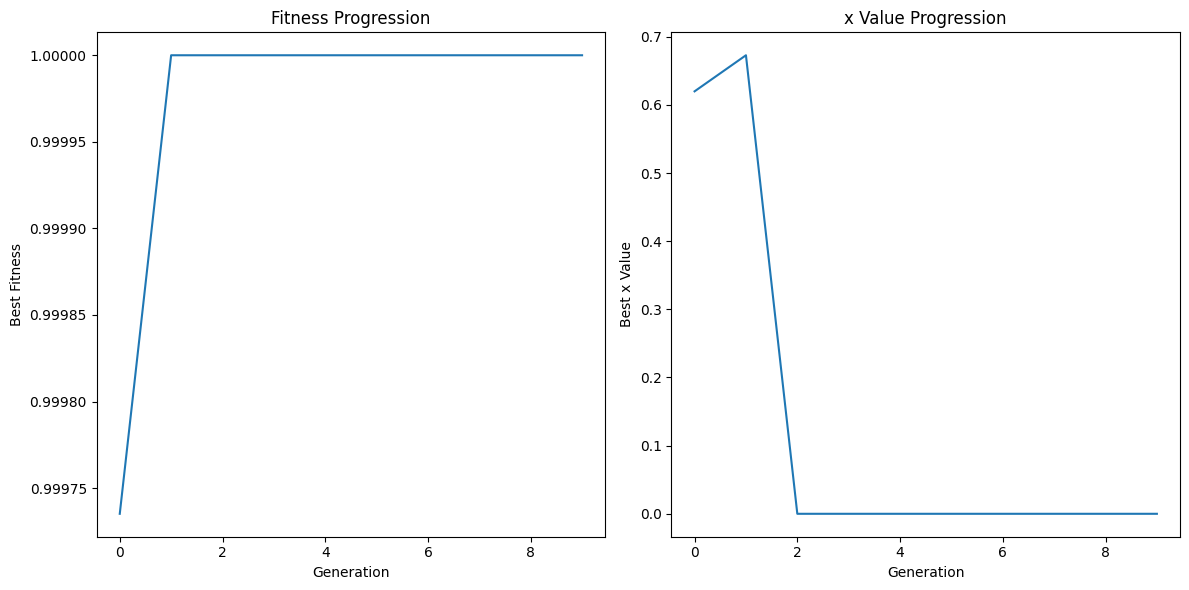

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Genetic Algorithm Parameters
population_size = 100
chromosome_length = 12  # Number of bits for binary encoding
a = 0.0                 # Lower bound of x
b = np.pi               # Upper bound of x (now set to π)
num_generations = 10
crossover_rate = 0.8
mutation_rate = 0.01    # Per-bit mutation probability
elitism_count = 2       # Number of elite individuals preserved
tournament_size = 3     # Tournament selection size

# Generate initial population
def generate_individual(length):
    return [random.randint(0, 1) for _ in range(length)]

population = [generate_individual(chromosome_length) for _ in range(population_size)]

# Convert binary chromosome to real value
def binary_to_x(binary, a, b, length):
    decimal = int(''.join(map(str, binary)), 2)
    max_decimal = (2 ** length) - 1
    return a + (decimal / max_decimal) * (b - a)

# Fitness evaluation
def evaluate_fitness(individual):
    x = binary_to_x(individual, a, b, chromosome_length)
    return np.sin(x)

# Tournament selection (unchanged)
def tournament_selection(population, fitnesses, tournament_size):
    candidates = random.sample(range(len(population)), tournament_size)
    best_index = candidates[0]
    for idx in candidates[1:]:
        if fitnesses[idx] > fitnesses[best_index]:
            best_index = idx
    return population[best_index]

# Single-point crossover (unchanged)
def crossover(parent1, parent2, crossover_rate):
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(parent1)-1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
    else:
        child1 = parent1.copy()
        child2 = parent2.copy()
    return child1, child2

# Bit-flip mutation (unchanged)
def mutate(individual, mutation_rate):
    mutated = individual.copy()
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            mutated[i] = 1 - mutated[i]
    return mutated

# Main GA loop (with updated bounds)
best_fitness_over_generations = []
best_x_values = []

for generation in range(num_generations):
    # Evaluate fitness
    fitnesses = [evaluate_fitness(ind) for ind in population]

    # Elitism: select top individuals
    elite_indices = np.argsort(fitnesses)[-elitism_count:]
    elites = [population[i] for i in elite_indices]

    # Create next population
    next_population = elites.copy()

    # Generate offspring
    while len(next_population) < population_size:
        # Selection
        parent1 = tournament_selection(population, fitnesses, tournament_size)
        parent2 = tournament_selection(population, fitnesses, tournament_size)

        # Crossover
        child1, child2 = crossover(parent1, parent2, crossover_rate)

        # Mutation
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)

        next_population.extend([child1, child2])

    # Trim to maintain population size
    population = next_population[:population_size]

    # Track best fitness and x value
    current_best_fitness = max(fitnesses)
    best_index = np.argmax(fitnesses)
    best_x = binary_to_x(population[best_index], a, b, chromosome_length)

    best_fitness_over_generations.append(current_best_fitness)
    best_x_values.append(best_x)

    print(f"Generation {generation:3d}: Best x = {best_x:.5f}, sin(x) = {current_best_fitness:.5f}")

# Results
best_index = np.argmax([evaluate_fitness(ind) for ind in population])
best_individual = population[best_index]
best_x = binary_to_x(best_individual, a, b, chromosome_length)

print(f"\nOptimal Solution:")
print(f"x = {best_x:.5f} ({(best_x/np.pi)*100:.1f}% of π)")
print(f"sin(x) = {np.sin(best_x):.5f}")


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, population_size, chromosome_length, lower_bound, upper_bound,
                 num_generations, crossover_rate, mutation_rate,
                 elitism_count, tournament_size):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.num_generations = num_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.elitism_count = elitism_count
        self.tournament_size = tournament_size

        self.population = [self.generate_individual(self.chromosome_length)
                           for _ in range(self.population_size)]

    def generate_individual(self, length):
        return [random.randint(0, 1) for _ in range(length)]

    def binary_to_x(self, binary):
        decimal = int(''.join(map(str, binary)), 2)
        max_decimal = (2 ** self.chromosome_length) - 1
        return self.lower_bound + (decimal / max_decimal) * (self.upper_bound - self.lower_bound)

    def evaluate_fitness(self, individual):
        x = self.binary_to_x(individual)
        return np.sin(x)

    def tournament_selection(self, fitnesses):
        candidates = random.sample(range(len(self.population)), self.tournament_size)
        best_index = candidates[0]
        for idx in candidates[1:]:
            if fitnesses[idx] > fitnesses[best_index]:
                best_index = idx
        return self.population[best_index]

    def crossover(parent1, parent2, crossover_rate):
        if random.random() < self.crossover_rate:

            point1 = random.randint(1, len(parent1) - 2)
            point2 = random.randint(point1 + 1, len(parent1) - 1)

            child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
            child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
        else:
            child1 = parent1.copy()
            child2 = parent2.copy()
        return child1, child2

    def mutate(self, individual):
        mutated = individual.copy()
        for i in range(len(mutated)):
            if random.random() < self.mutation_rate:
                mutated[i] = 1 - mutated[i]
        return mutated

    def run(self):
        best_fitness_over_generations = []
        best_x_values = []

        for generation in range(self.num_generations):
            fitnesses = [self.evaluate_fitness(ind) for ind in self.population]

            elite_indices = np.argsort(fitnesses)[-self.elitism_count:]
            elites = [self.population[i] for i in elite_indices]

            next_population = elites.copy()

            while len(next_population) < self.population_size:
                parent1 = self.tournament_selection(fitnesses)
                parent2 = self.tournament_selection(fitnesses)

                child1, child2 = self.crossover(parent1, parent2)

                child1 = self.mutate(child1)
                child2 = self.mutate(child2)

                next_population.extend([child1, child2])

            self.population = next_population[:self.population_size]

            current_best_fitness = max(fitnesses)
            best_index = np.argmax(fitnesses)
            best_x = self.binary_to_x(self.population[best_index])

            best_fitness_over_generations.append(current_best_fitness)
            best_x_values.append(best_x)

            print(f"Generation {generation:3d}: Best x = {best_x:.5f}, sin(x) = {current_best_fitness:.5f}")

        best_index = np.argmax([self.evaluate_fitness(ind) for ind in self.population])
        best_individual = self.population[best_index]
        best_x = self.binary_to_x(best_individual)

        print(f"\nOptimal Solution:")
        print(f"x = {best_x:.5f} ({(best_x/np.pi)*100:.1f}% of π)")
        print(f"sin(x) = {np.sin(best_x):.5f}")

        return best_fitness_over_generations, best_x_values

def plot_results(best_fitness_over_generations, best_x_values):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Fitness on the primary y-axis (ax1)
    ax1.plot(best_fitness_over_generations, marker='o', linestyle='-', color='blue', label='Fitness')
    ax1.set_xlabel('Generation', fontsize=12)
    ax1.set_ylabel('Best Fitness', fontsize=12, color='blue')
    ax1.tick_params('y', labelcolor='blue')  # Set y-axis tick color

    # Create a secondary y-axis (ax2)
    ax2 = ax1.twinx()

    # Plot X value on the secondary y-axis (ax2)
    ax2.plot(best_x_values, marker='s', linestyle='--', color='red', label='x Value')
    ax2.set_ylabel('Best x Value', fontsize=12, color='red')
    ax2.tick_params('y', labelcolor='red')  # Set y-axis tick color

    # Add title, grid, and legend
    plt.title('Fitness and x Value Progression', fontsize=14)
    plt.grid(True)
    fig.legend(loc="upper right")  # Combine legends from both axes

    plt.tight_layout()
    plt.show()

# Configuration
params = {
    'population_size': 50,
    'chromosome_length': 12,
    'lower_bound': 0.0,
    'upper_bound': np.pi,
    'num_generations': 30,
    'crossover_rate': 0.2,
    'mutation_rate': 0.01,
    'elitism_count': 2,
    'tournament_size': 3
}

# Run the genetic algorithm
ga = GeneticAlgorithm(**params)
best_fitness_over_generations, best_x_values = ga.run()

# Plot the results
plot_results(best_fitness_over_generations, best_x_values)

NameError: name 'self' is not defined

# Genetic Algorithm for Maximizing sin(x)

**Introduction:**

This notebook demonstrates a Genetic Algorithm (GA) to find the value of 'x' within a specified range that maximizes the function `sin(x)`. The GA uses binary encoding, tournament selection, single-point crossover, and bit-flip mutation to evolve a population of solutions towards the optimal result.

**Algorithm Parameters:**

- **`population_size`:** The number of individuals in each generation.
- **`chromosome_length`:** The length of the binary string representing each individual.
- **`lower_bound`:** The lower bound of the search space for 'x'.
- **`upper_bound`:** The upper bound of the search space for 'x'.
- **`num_generations`:** The total number of generations the GA will run for.
- **`crossover_rate`:** The probability of applying crossover to create offspring.
- **`mutation_rate`:** The probability of flipping a bit in an individual's chromosome.
- **`elitism_count`:** The number of best individuals preserved in each generation.
- **`tournament_size`:** The number of individuals randomly selected to compete in a tournament for selection.

**Code Explanation:**

1. **`GeneticAlgorithm` Class:** This class encapsulates the GA logic, including methods for initialization, individual generation, fitness evaluation, selection, crossover, mutation, and running the algorithm.

2. **`plot_results` Function:** This function handles the visualization of results using Matplotlib, plotting both fitness and x value progression over generations on a single plot with a secondary y-axis.

**How to Run:**

1. Execute all the code cells in the notebook.
2. Observe the output, which includes the optimal solution (x value and sin(x) value) and the plots showing the progression of fitness and x values over generations.

**Experimentation:**

- You can modify the GA parameters in the `params` dictionary to experiment with different settings.
- You can also change the fitness function (e.g., to optimize a different function) by modifying the `evaluate_fitness` method within the `GeneticAlgorithm` class.

**Note:**

- The performance of the GA can be influenced by the choice of parameters. Experimentation is often required to find the optimal settings for a specific problem.
- The algorithm is stochastic, meaning that results may vary slightly between runs.